In [1]:
using SymPy

┌ Info: Recompiling stale cache file /Users/malcolm/.julia/compiled/v1.0/SymPy/KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1187


In [2]:
u = symbols("u")
x = symbols("x", real=true)
y1, y2 = symbols("y1, y2", positive=true)
alpha = symbols("alpha", integer=true, positive=true)

alpha

In [3]:
typeof(x)

Sym

In [4]:
solve(x^2 + 1)

0-element Array{Sym,1}

In [5]:
solve(u^2 + 1)

2-element Array{Sym,1}:
 -I
  I

In [6]:
@vars x y
ex = x^2 + 2x + 1
subs(ex, x, y)

 2          
y  + 2*y + 1

In [7]:
ex |> subs(x, 1)

4

In [8]:
p = x^2 + 3x + 2

 2          
x  + 3*x + 2

In [9]:
factor(p)

(x + 1)*(x + 2)

In [10]:
expand(prod([(x-i) for i in 1:5]))

 5       4       3        2              
x  - 15*x  + 85*x  - 225*x  + 274*x - 120

In [15]:
p = x^2 + 6x + 9; factor(p)

       2
(x + 3) 

In [16]:
q = x*y + x*y^2 + x^2*y + x

 2        2          
x *y + x*y  + x*y + x

In [17]:
collect(q, x)

 2       / 2        \
x *y + x*\y  + y + 1/

In [18]:
collect(q,y)

   2         / 2    \
x*y  + x + y*\x  + x/

In [19]:
r = 1/x + 1/x^2

1   1 
- + --
x    2
    x 

In [20]:
together(r)

x + 1
-----
   2 
  x  

In [21]:
apart( (4x^3 + 21x^2 + 10x + 12) /  (x^4 + 5x^3 + 5x^2 + 4x))

 2*x - 1       1     3
---------- - ----- + -
 2           x + 4   x
x  + x + 1            

In [22]:
theta = symbols("theta", real=true)

theta

In [23]:
p = cos(theta)^2 + sin(theta)^2

   2             2       
sin (theta) + cos (theta)

In [24]:
simplify(sin(2theta) - 2sin(theta)*cos(theta))

0

In [25]:
# SymPy can solve polynomial equations
p = (x-3)^2*(x-2)*(x-1)*x*(x+1)*(x^2 + x + 1)

         2                         / 2        \
x*(x - 3) *(x - 2)*(x - 1)*(x + 1)*\x  + x + 1/

In [26]:
real_roots(p)

6-element Array{Sym,1}:
 -1
  0
  1
  2
  3
  3

In [27]:
solve(p)

7-element Array{Sym,1}:
                 -1
                  0
                  1
                  2
                  3
 -1/2 - sqrt(3)*I/2
 -1/2 + sqrt(3)*I/2

In [29]:
# We can use the Plot API to display graphs
x = symbols("x")
using Plots
pyplot()

Plots.PyPlotBackend()

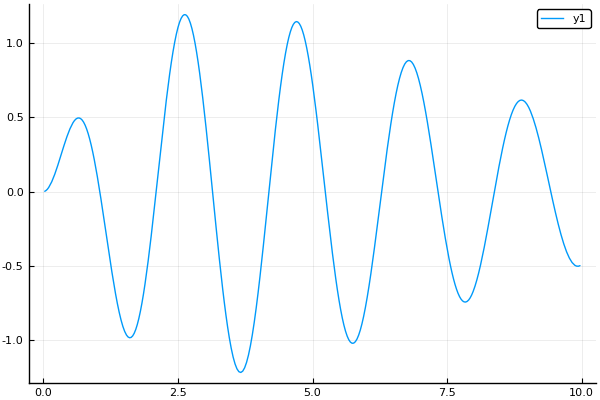

In [33]:
plot(x*sin(3.0x)*exp(-0.3x), 0, 10)

In [35]:
# This is the Basel series
#
i, n = symbols("i, n")
summation(i^2, (i, 1, n))

 3    2    
n    n    n
-- + -- + -
3    2    6

In [36]:
sn = Sum(1/i^2, (i, 1, n))
doit(sn)

harmonic(n, 2)

In [37]:
limit(doit(sn), n, oo)

  2
pi 
---
 6 

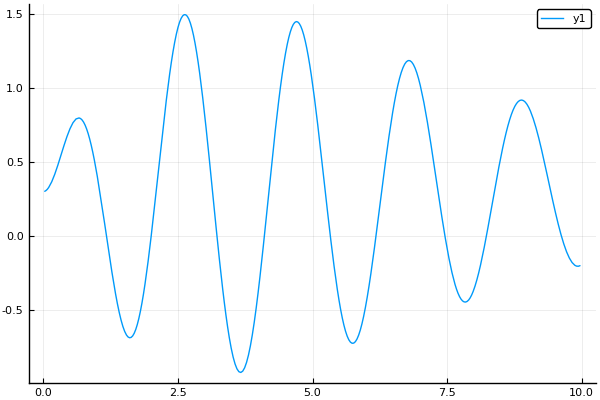

In [42]:
pp = 0.3 + x*sin(3.0x)*exp(-0.3x)
plot(pp, 0, 10)

In [41]:
# An initial valued problem
#
y = SymFunction("y")
a, x = symbols("a,x")
eqn = y'(x) - 3*x*y(x) - 1

            d           
-3*x*y(x) + --(y(x)) - 1
            dx          

In [43]:
x0, y0 = 0, 4
out = dsolve(eqn, x, (y, x0, y0))

       /                /  ___  \    \     2
       |  ___   ____    |\/ 6 *x|    |  3*x 
       |\/ 6 *\/ pi *erf|-------|    |  ----
       |                \   2   /    |   2  
y(x) = |------------------------- + 4|*e    
       \            6                /      

In [44]:
x0, y0 = 0, a
out = dsolve(eqn, x, (y, x0, y0))

       /                    /  ___  \\     2
       |      ___   ____    |\/ 6 *x||  3*x 
       |    \/ 6 *\/ pi *erf|-------||  ----
       |                    \   2   /|   2  
y(x) = |a + -------------------------|*e    
       \                6            /      

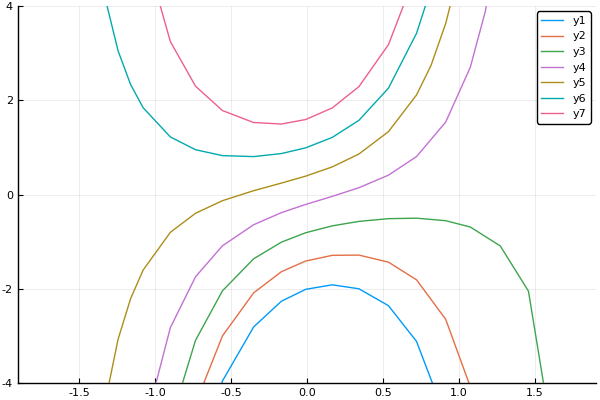

In [45]:
as = -2:0.6:2
ex = rhs(out)
p = plot(ex(a=>as[1]), -1.8, 1.8, ylims=(-4, 4))
[plot!(p, ex(a=>i), -1.8, 1.8, ylims=(-4, 4)) for i in as[2:end]]
p  